# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

## Importy

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Pobranie i wyświetlenie obrazu

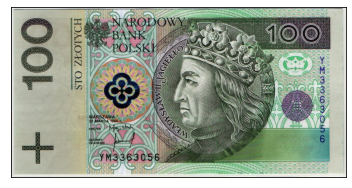

In [3]:
if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
        
I = cv2.imread("100zloty.jpg")

plt.figure (figsize=(6,6))
plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.show()

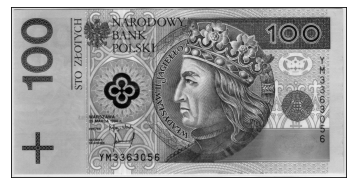

In [4]:
image = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

plt.figure (figsize=(6,6))
plt.gray()
plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

## Funkcje

#### Podział obrazu na 8 masek

In [15]:
def divide_to_masks (image):
    arr = np.unpackbits (image.reshape((image.shape[0],image.shape[1],1)), axis=2)
    masks = []
    for pos in range (8):
        m = np.zeros_like(image)
        m[:,:] = arr[:,:,pos]
        masks.append(m)
    plt.figure (figsize=(15, 20))
    for i, mask in enumerate(masks):
        plt.subplot (421+i)
        plt.title ("Bit numer: " + str(i))
        plt.imshow(mask)
    plt.show()
    return masks

#### Połączenie k masek w 1 obraz

In [16]:
def merge_masks (masks, k):
    new_image = np.zeros_like (masks[0])
    for i, mask in enumerate(masks[:k]):
        #new_image = 2*new_image
        new_image += mask * 2**(7-i)
        
    plt.figure (figsize=(6,6))
    plt.gray()
    plt.imshow(new_image)
    plt.xticks([]), plt.yticks([])
    plt.show()
    return new_image

## Efekty działania

Widzimy jak numer bitu wpływa na znaczenie, najstarszy bit jest najważniejszy.

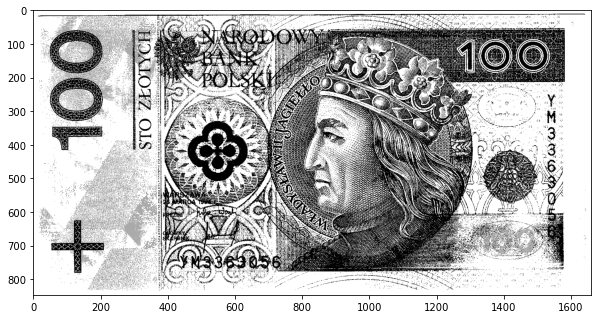

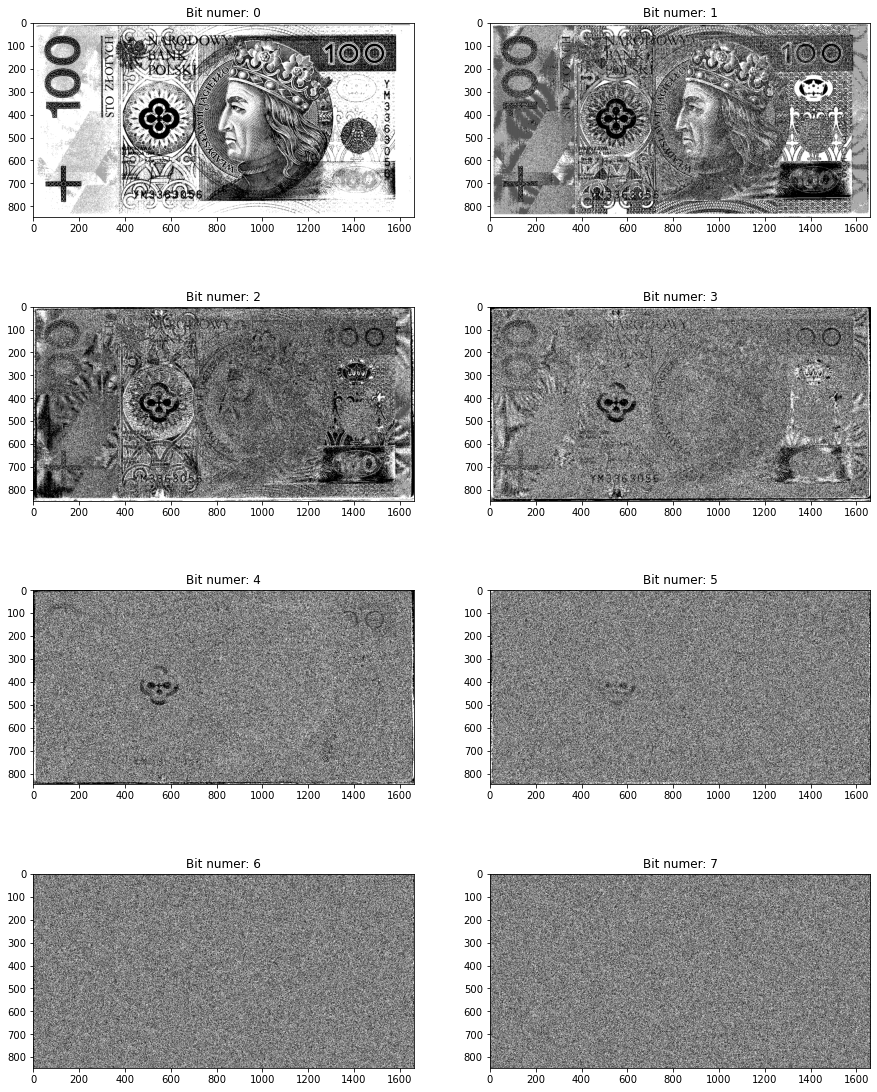

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(image>128)

masks = divide_to_masks (image)

Efekt łączenia mask od 1 do 8 od najstarszej zaczynając.

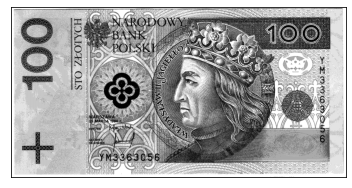

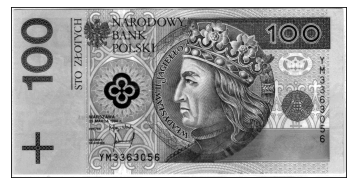

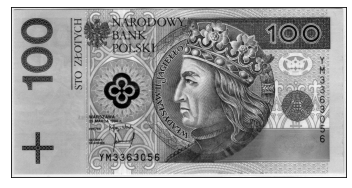

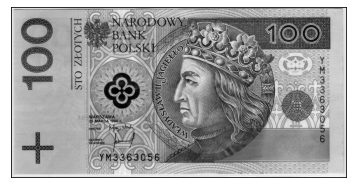

In [7]:
#_ = merge_masks (masks, 1)
_ = merge_masks (masks, 2)
_ = merge_masks (masks, 3)
_ = merge_masks (masks, 4)
#_ = merge_masks (masks, 5)
_ = merge_masks (masks, 6)
#_ = merge_masks (masks, 7)
#_ = merge_masks (masks, 8)